# Packages

In [1]:
# Numerical and Data Manipulation
import numpy as np
import pandas as pd
import itertools

# Database Querying
import yfinance as yf

# Model Setup and Manipulation
from arch import arch_model
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Plotting
import matplotlib.pyplot as plt

# Functions

In [2]:
def plot(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    plt.ylabel('Close')
    plt.xlabel('Time')
    plt.title(title)
    plt.show()

In [3]:
def get_data(ticker, time_frame):
    '''
    Returns pandas DataFrame of given 
    ticker: company Ticker in Yahoo Finance
    time_frame = fraction of a year
    '''
    df = yf.download(ticker,
                     start=dt.datetime.today() - dt.timedelta(days=time_frame*365), 
                     end=dt.datetime.today())['Close']
    df = pd.DataFrame(df)
    return pd.DataFrame(df)

In [4]:
# Differencing
def diff(data, times):
    return list(itertools.chain(*(np.array((data - data.shift(-times).dropna()).dropna()).tolist())))

# pd.DataFrame((data - data.shift(-times).dropna()))

In [5]:
def volatility(data, time_frame):
    '''
    Returns volatility of given time frame.
    data: Pandas DataFrame
    time_frame: integer
    '''
    vol_list = []
    for i in range(len(data) + 1):
        for j in range(len(data) + 1):
            if j - i == time_frame:
                vol_list.append(np.std(np.array(((np.log(data) - np.log(data).shift(1)).dropna())[i:j]).tolist()))
                break
    return vol_list

In [6]:
# np.std(np.array(((np.log(TGT) - np.log(TGT).shift(1)).dropna())[0:5]).tolist())

# Annaul Volatility

In [7]:
def annual_volatility(data, ticker):
    return np.std(np.array((np.log(data) - np.log(data.shift(1))).dropna()).tolist()) * np.sqrt(252)

In [9]:
annual_volatility(TGT, 'TGT')

NameError: name 'TGT' is not defined

In [10]:
# Actual Days
# ticker = TGT
# len(get_data(str(ticker), 1))

# Analysis

[*********************100%%**********************]  1 of 1 completed


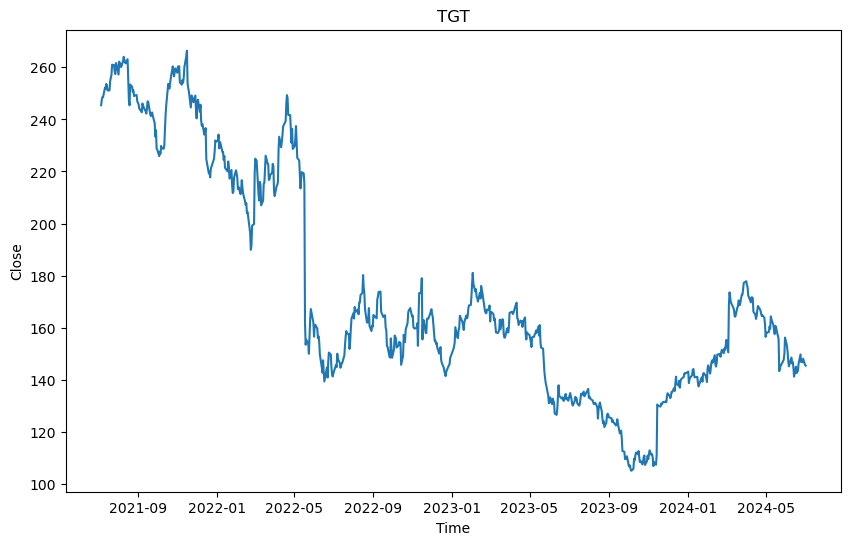

                 Close
Date                  
2021-07-06  245.449997
2021-07-07  247.550003
2021-07-08  248.580002
2021-07-09  248.580002
2021-07-12  252.240005
...                ...
2024-06-26  147.169998
2024-06-27  146.720001
2024-06-28  148.039993
2024-07-01  145.740005
2024-07-02  145.389999

[753 rows x 1 columns]


In [11]:
TGT = get_data('TGT', 3)
plot(TGT, 'TGT')
print(TGT)

# TGT.to_excel('TGT3.xlsx')

In [12]:
p_value = []
length = [1, 2, 3 ,4 ,5, 6, 7, 8, 9, 10]
for i in length:
    p_value.append(adfuller(diff(TGT, i))[1])
p_value

[3.0723774668063993e-27,
 5.8066053543837645e-06,
 7.075395098907797e-06,
 2.598457613390058e-06,
 5.873238810600461e-06,
 1.6524967655534603e-06,
 4.344837562876944e-07,
 9.723303933380242e-06,
 3.171331315744078e-05,
 2.88044282099484e-05]

In [13]:
price_p_value = adfuller(TGT)[1]
if price_p_value > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

Nonstationary


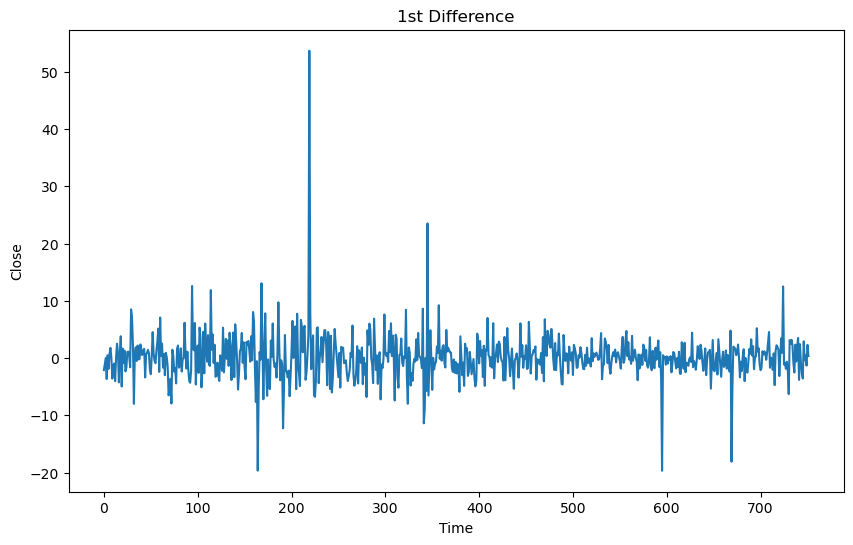

In [14]:
# First Differencing
diff1 = diff(TGT, 1)
# print(diff1)
plot(diff1, '1st Difference')

# file_name = 'diff1_1.xlsx'
# pd.DataFrame(diff1).to_excel(file_name)

In [15]:
# Check Stationarity (Augmented Dickey Fuller Tests)
diff_p = adfuller(diff1)[1]
if diff_p > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

Stationary


# ACF and PACF

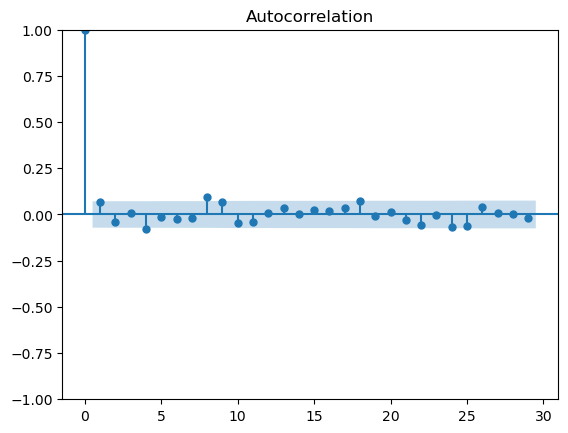

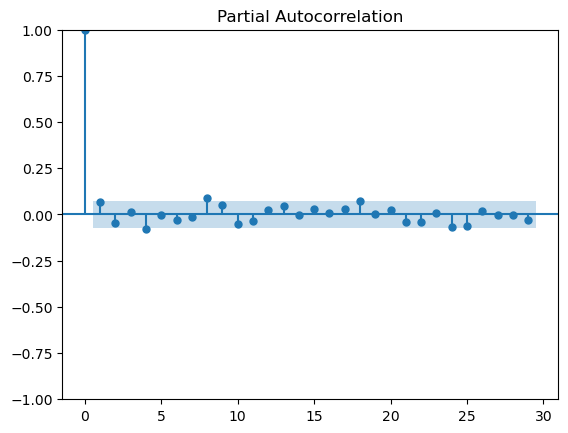

In [16]:
data = TGT
acf = plot_acf(np.array(diff(data, 1)))
pacf = plot_pacf(np.array(diff(data, 1)))

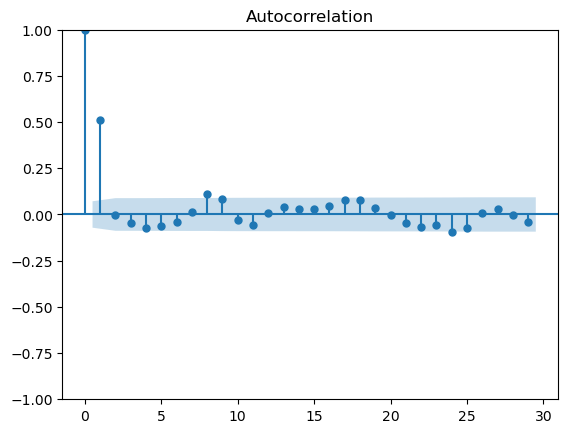

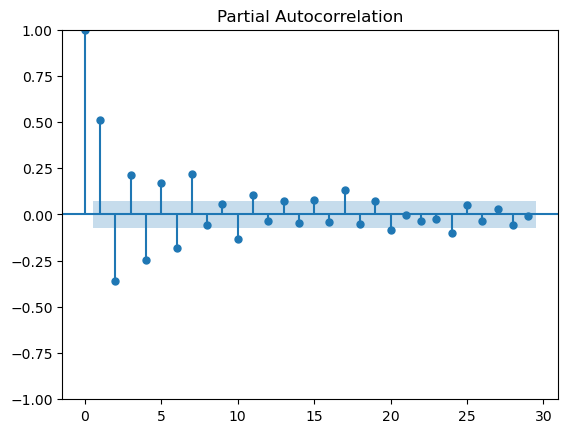

In [17]:
# Plot ACF and PACF, Identify AR and MA periods
data = TGT
acf = plot_acf(np.array(diff(data, 2)))
pacf = plot_pacf(np.array(diff(data, 2)))

# 5 Days Volatility

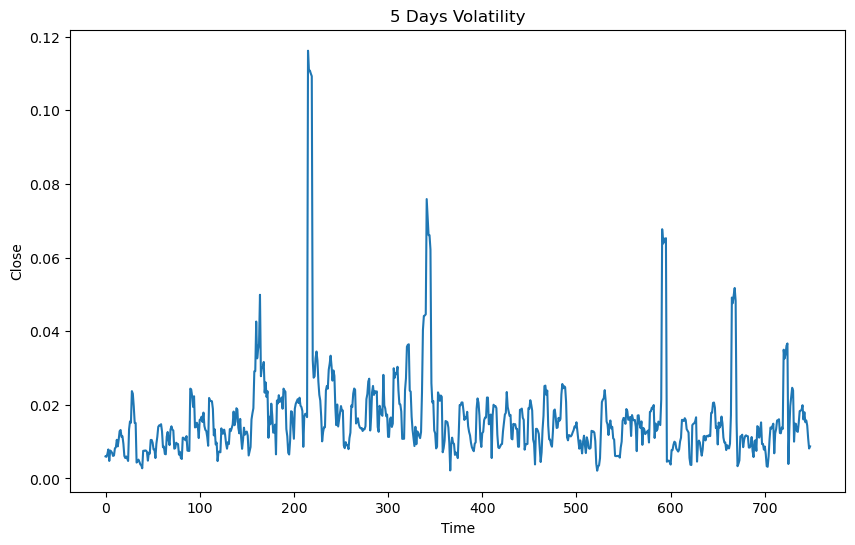

In [18]:
vol5 = volatility(TGT, 5)
plot(vol5, '5 Days Volatility')
# vol5

In [19]:
price_p_value = adfuller(vol5)[1]
if price_p_value > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

Stationary


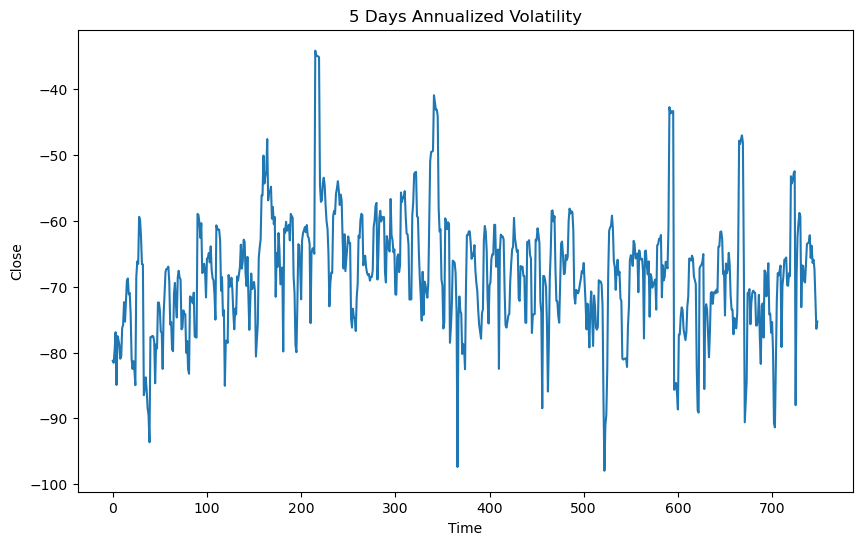

In [20]:
vol5_annual = (np.log(vol5) * np.sqrt(252)).tolist()
plot(vol5_annual, '5 Days Annualized Volatility')
# vol5_annual

In [21]:
price_p_value = adfuller(vol5_annual)[1]
if price_p_value > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

Stationary


# Annual Volatility

In [22]:
vol_annual = np.std(np.array((np.log(TGT) - np.log(TGT.shift(1))).dropna()).tolist()) * np.sqrt(len(get_data('TGT', 1)))
vol_annual

[*********************100%%**********************]  1 of 1 completed


0.361745289134212